In [3]:
"""
특성선택 :
변수를 줄임
tree : variables importance
PCA : 고유값 : 분산크기에 따라 정렬
"""
from sklearn.datasets import make_friedman1 #데이터 생성 함수
# feature_extraction
# model_selection
from sklearn.svm import SVR # support vrctor regressor #분류
from sklearn.feature_selection import RFE # recursive feature eliminate(제거)

X, y = make_friedman1(n_samples=50, n_features=10, random_state=0) # 50x10
# SVM은 고차원을 선호 (타모델은 풀어쓴것을 선호)=> xor문제를 고차원으로 해결 
estimator = SVR(kernel='linear') # 선형으로 -  'linear', 'poly'(polynomial), 'rbf'(방사형함수), 'sigmoid', 'precomputed'
selector= RFE(estimator, 5, step=1) # 자동으로 변수 선택 (중요하지않은 변수 제거)

# print(X)
# print(y)

selector = selector.fit(X, y)
print(selector.support_)
print(selector.ranking_)
print(selector.n_features_)

[ True  True  True  True  True False False False False False]
[1 1 1 1 1 6 4 3 2 5]
5


In [5]:
type(selector)

sklearn.feature_selection.rfe.RFE

In [11]:
"""
문제 ) 예측값과 실제값의 차이를 출력 하시오(테스터데이터는 X를 그대로 사용하시오)
"""
MSE = sum((selector.predict(X) - y)**2)/50 #
MSE

10.577977002630696

In [5]:
"""
특성추출
"""
sample = ['problem of evil',
          'evil queen',
          'horizon problem']

from sklearn.feature_extraction.text import CountVectorizer
# scipy.sparse.csr.csr_matrix : 희소하다 => 저장방식이 다름

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(sample) # fit 유니크한 단어를 학습 후 Tranform(카운트)
print(type(X))
X
          

<class 'scipy.sparse.csr.csr_matrix'>


<3x5 sparse matrix of type '<class 'numpy.int64'>'
	with 7 stored elements in Compressed Sparse Row format>

In [6]:
import pandas as pd
pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names()) # 추출된 특징

,evil,horizon,of,problem,queen
0,1,0,1,1,0
1,1,0,0,0,1
2,0,1,0,1,0


In [17]:
vectorizer.vocabulary_

{'problem': 3, 'of': 2, 'evil': 0, 'queen': 4, 'horizon': 1}

In [22]:
# text frequency and inverse document frequency
# term frequency * log(inverse document frequency)
# 로그를 곱해주는 이유는 숫자가 크기때문
from sklearn.feature_extraction.text import TfidfVectorizer 
vec = TfidfVectorizer()
X = vec.fit_transform(sample)
# 단어의 중요도를 고려해서 평가 : 특징을 계산한 것이 더 정확하다
X
pd.DataFrame(X.toarray(), columns=vec.get_feature_names()) # 위에 카운트보다 더정교

,evil,horizon,of,problem,queen
0,0.517856,0.000000,0.680919,0.517856,0.000000
1,0.605349,0.000000,0.000000,0.000000,0.795961
2,0.000000,0.795961,0.000000,0.605349,0.000000


[1 2 3 4 5] 

 [[1]
 [2]
 [3]
 [4]
 [5]]


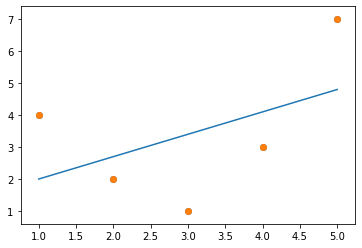

In [88]:
import numpy as np
import matplotlib.pyplot as plt
x = np.array([1, 2, 3, 4, 5])
y = np.array([4, 2, 1, 3, 7])
plt.scatter(x, y)
# LinearRegression을 이용해서 선형회귀 하시오

# x = x.astype(float)

# estimator = SVR(kernel='linear') # 선형으로 -  'linear', 'poly'(polynomial), 'rbf'(방사형함수), 'sigmoid', 'precomputed'
# selector= RFE(estimator, 5, step=1) # 자동으로 변수 선택 (중요하지않은 변수 제거)
# selector = selector.fit(x, y)
# print(selector.support_)
# print(selector.ranking_)
# print(selector.n_features_)

# from sklearn import linear_model
# reg = linear_model.LinearRegression(n_jobs=-1) # 모델 인스턴스, n_jobs 파라미터는 cpu코어 사용개수 의미 , -1은 전부사용
# reg.fit(x, y) # 회귀 , 최소제곱법으로 기울기, 절편 구함


#열데이터로 입력
from sklearn.linear_model import LinearRegression
X = x[:, np.newaxis] # 2차원으로 변경
print(x, "\n\n", X)
model = LinearRegression().fit(X, y)
yfit = model.predict(X)
plt.scatter(x, y)
plt.plot(x, yfit)


[1 2 3 4 5] 

 [4 2 1 3 7]


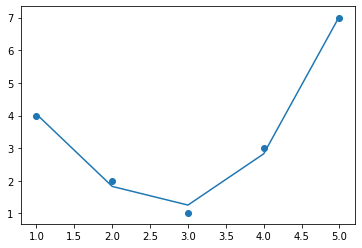

In [89]:
# 비선형
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3, include_bias=False) #3차원 : 다차원 확장
X2 = poly.fit_transform(X)
print(x, '\n\n', y)

model = LinearRegression().fit(X2, y) # 선형회귀 모델
yfit = model.predict(X2)
plt.scatter(x, y)
plt.plot(x, yfit)

In [90]:
# 결측치 평균값으로 처리
from numpy import nan
x = np.array([[nan, 0, 3],
             [3, 7, 9],
             [3, 5, 2],
             [4, nan, 6],
             [8, 8, 1]])
y = np.array([14, 16, -1, 8, -5])

from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy="mean") # mean, median, most_frequency(최빈수) # 열기준
X = imp_mean.fit_transform(x)
X

array([[4.5, 0. , 3. ],
       [3. , 7. , 9. ],
       [3. , 5. , 2. ],
       [4. , 5. , 6. ],
       [8. , 8. , 1. ]])

In [65]:
model = LinearRegression().fit(X, y) # 선형회귀 모델
model.predict(X)

array([13.14869292, 14.3784627 , -1.15539732, 10.96606197, -5.33782027])

In [94]:
# 위의 선형회귀를 비선형회귀로 변경하시오
# -파이프라인이 필요
"""
SimplrImputer
PolynomialFeatures
LinearRegression
를 하나로

파이프라인 
필요한 이유 : chaining 
    train validation test 데이터3그룹 매번 넣어줘야한다

중간만 보고싶을경우 모델을 하나더 만들어야...

"""

from sklearn.pipeline import make_pipeline
model = make_pipeline(SimpleImputer(strategy='mean'), 
                     PolynomialFeatures(degree=2),
                     LinearRegression())
model.fit(X, y)
print(x)
print(y)
print(X)
print(model.predict(X))


[[nan  0.  3.]
 [ 3.  7.  9.]
 [ 3.  5.  2.]
 [ 4. nan  6.]
 [ 8.  8.  1.]]
[14 16 -1  8 -5]
[[4.5 0.  3. ]
 [3.  7.  9. ]
 [3.  5.  2. ]
 [4.  5.  6. ]
 [8.  8.  1. ]]
[14. 16. -1.  8. -5.]


In [93]:
model2 = make_pipeline(SimpleImputer(strategy='mean'), 
                     PolynomialFeatures(degree=2))
model2.fit_transform(X)

array([[ 1.  ,  4.5 ,  0.  ,  3.  , 20.25,  0.  , 13.5 ,  0.  ,  0.  ,
         9.  ],
       [ 1.  ,  3.  ,  7.  ,  9.  ,  9.  , 21.  , 27.  , 49.  , 63.  ,
        81.  ],
       [ 1.  ,  3.  ,  5.  ,  2.  ,  9.  , 15.  ,  6.  , 25.  , 10.  ,
         4.  ],
       [ 1.  ,  4.  ,  5.  ,  6.  , 16.  , 20.  , 24.  , 25.  , 30.  ,
        36.  ],
       [ 1.  ,  8.  ,  8.  ,  1.  , 64.  , 64.  ,  8.  , 64.  ,  8.  ,
         1.  ]])

In [ ]:
#GridSearchCV

In [2]:
import pandas as pd
import seaborn as sns
import pprint
import time
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC # 
from sklearn.model_selection import GridSearchCV # 격자 (조합)


winedf = pd.read_csv('winequality-red.csv', sep=';')
print(winedf.head(3))
X=winedf.drop(['quality'], axis=1) # 분류문제 : target
Y=winedf['quality']
steps = [('scaler', StandardScaler()), ('SVM', SVC())] # 파라미터 : StandardScaler 정규화, SVC 데이터분류, 예측
pipeline = Pipeline(steps) # 파이프라인 생셩
#10가지
parameters = {'SVM__C':[0.001, 0.1, 10, 100, 10e5], 'SVM__gamma': [0.1, 0.01]} # SVM__C 범위 파라미터, # 10 
# parameters = {'SVM__C':[1, 5, 10, 15, 20], 'SVM__gamma': [0.02, 0.1, 0.5]} # SVM__C 범위 파라미터, 


X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=30, stratify=Y) #데이터 그룹분할

# estimator 
grid = GridSearchCV(pipeline, param_grid=parameters, cv=5) # 50번 테스트 # CV Cross Validation
grid.fit(X_train, y_train) # 평가
print("score = %3.2f" %(grid.score(X_test, y_test)))

# print(grid.best_params_)
# print(grid.best_score_)
# print(grid.best_estimator_)


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
score = 0.67


In [ ]:
# 오전 종료 ===========================================================================================================================================================================================================

In [3]:
"""
Tree : Binary Tree (정렬된 데이터를 저장할떄) -> decision Tree (의사결정)
 - 통계학
 선형성 독립성 공분산성 정규성
     - 대부분 못맞추고 비모수
 - 비모수 : 추정기능이 없음(p-value 확률값)
 - 데이터 전체 데이터가 학습에 참여
 - 화이트박스라 시각화하기 편하다
 - 불안정하고 과적합하는 경향이 있지만 위 장점이 있다
 - DT -> RF -> Ada Boost(약한 모델 -> 강한모델 : 가중치를 부여 ) -> 오차수정 Gradient Boost (결합)
 - Classifier & Regressor 있음
     - Regressor를 집단회귀 범위값으로 예측
 - 분리기준 : 불순도 - 점점작아지는 방향으로 나눔 => 정보기반학습(불순도 기반에 따라 학습)
     - 불순도 척도 : gini지수(디폴트값: 계산이 빠르다), enthropy 지수
     - 위 기준으로 불순도 나누었을때 더 복잡해지면 나누지 않는다
     - 가지치기(pruning) <- 불순도 높은것을
"""

'\nTree : Binary Tree (정렬된 데이터를 저장할떄) -> decision Tree (의사결정)\n - 통계학\n 선형성 독립성 공분산성 정규성\n     - 대부분 못맞추고 비모수\n - 비모수 : 추정기능이 없음(p-value 확률값)\n - 데이터 전체 데이터가 학습에 참여\n - 화이트박스라 시각화하기 편하다\n - 불안정하고 과적합하는 경향이 있지만 위 장점이 있다\n - DT -> RF -> Ada Boost(약한 모델 -> 강한모델 : 가중치를 부여 ) -> 오차수정 Gradient Boost (결합)\n - Classifier & Regressor 있음\n     - Regressor 집단회귀\n'

In [4]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn import tree
import matplotlib.pyplot as plt
clf = tree.DecisionTreeClassifier(random_state=0)
iris = load_iris()

[Text(334.8, 597.96, 'X[3] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(283.2923076923077, 489.24, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(386.3076923076923, 489.24, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(206.03076923076924, 380.52000000000004, 'X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(103.01538461538462, 271.8, 'X[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(51.50769230769231, 163.07999999999998, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(154.52307692307693, 163.07999999999998, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(309.04615384615386, 271.8, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(257.53846153846155, 163.07999999999998, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(360.55384615384617, 163.07999999999998, 'X[2] <= 5.45\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(309.04615384615386, 54.360000000

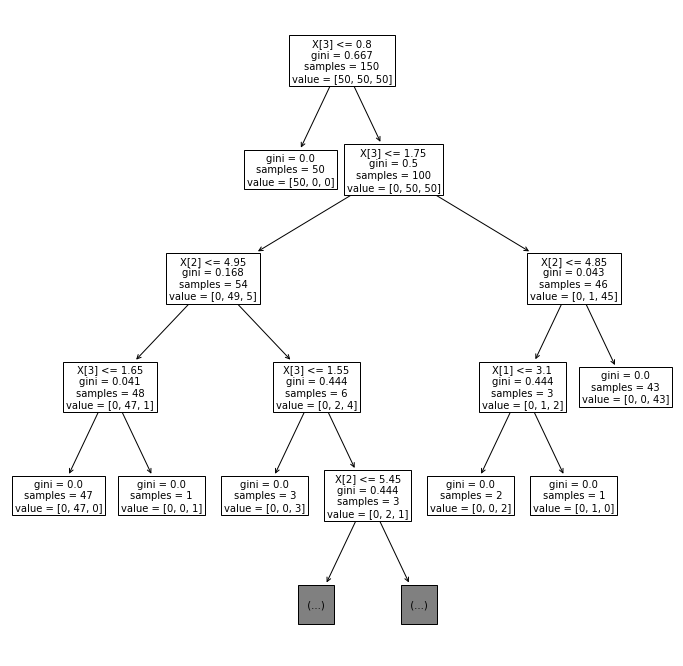

In [5]:
fig, ax = plt.subplots(figsize = (12, 12))
clf = clf.fit(iris.data, iris.target)
tree.plot_tree(clf, max_depth=4, fontsize=10)

In [6]:
cross_val_score(clf, iris.data, iris.target, cv=10)

array([1.        , 0.93333333, 1.        , 0.93333333, 0.93333333,
       0.86666667, 0.93333333, 1.        , 1.        , 1.        ])

In [7]:
clf.get_depth() # 몇단계

5

In [8]:
print(clf.get_n_leaves()) # 말단 노드가 9개

9


In [11]:
data = pd.DataFrame(iris.data)
print(data.head())
clf.predict(data.iloc[1:150, :]) # 이렇게 나올것이다 예상

     0    1    2    3
0  5.1  3.5  1.4  0.2
1  4.9  3.0  1.4  0.2
2  4.7  3.2  1.3  0.2
3  4.6  3.1  1.5  0.2
4  5.0  3.6  1.4  0.2


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [13]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=3, n_redundant=0)

In [15]:
# decision tree 모델을 생성하고 예측후 실제값과 예측한값의 평균을 출력하시오


dt = tree.DecisionTreeClassifier()
dt.fit(X, y)
preds = dt.predict(X)
(y == preds).mean()

1.0

In [18]:
X = iris.data[:, 2:]
y = iris.target
tree_clf = tree.DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

In [22]:
from sklearn.tree import export_graphviz
export_graphviz(tree_clf, 
               out_file='./images/iris_tree.dot',
               feature_names=["꽃잎 길이(cm)", "꽃잎 너비(cm)"],
               class_names=iris.target_names,
               rounded=True, filled=True)


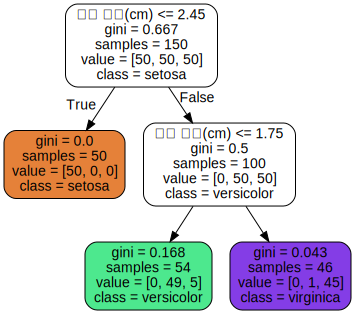

In [26]:
import graphviz
with open("./images/iris_tree.dot", encoding='UTF8') as f:
    dot_graph = f.read()
dot = graphviz.Source(dot_graph)
dot.format='png'
dot.render(filename='iris_tree', directory='./images', cleanup=True)
dot



지니지수
$$
G_i = 1 - \sum_{k=1}^{n}{p_{i,k}^{2}}
$$
엔트로피
$$
H_i = - \sum_{\underset{p_{i,k} \neq 0}{k=1}}^{n}{p_{i,k} \log_{2}{\left( p_{i, k} \right)}}
$$ 

In [35]:
#불순도 지니계수
# p = 확률
a = 1-(0/54)**2 - (49/54)**2 - (5/54)**2
b = 1-(0/46)**2 - (1/46)**2 - (45/46)**2

print(a,' // ', b)

#불순도 엔트로피
import math
c = -(49/54) * math.log2(49/54) - (5/54) * math.log2(5/54)

print(c)


0.1680384087791495  //  0.04253308128544431
0.44506485705083865


In [39]:
#메일 복붙
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np
def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris-Setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris-Versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris-Virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("꽃잎 길이", fontsize=14)
        plt.ylabel("꽃잎 너비", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14) 

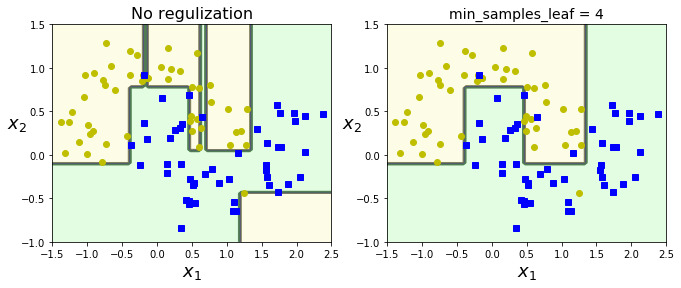

In [41]:
"""
Tree의 규제 (Regurlization)
- min_samples_split : 노드의 최소한의 개수되어야 나눔
- min_samples_leaf : 리프 노드가 가져야하는 최소 샘플수
- max_leaf_nodes : 리프 노드의 최대 개수
- max_features : 각 노드에서 분할을 할 때 사용할 특성
- max_depth : 깊이를 제한 

"""
from sklearn.datasets import make_moons
Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=53)

deep_tree_clf1 = tree.DecisionTreeClassifier(random_state=42)
#
deep_tree_clf2 = tree.DecisionTreeClassifier(min_samples_leaf=4, random_state=42)
deep_tree_clf1.fit(Xm, ym)
deep_tree_clf2.fit(Xm, ym)

plt.figure(figsize=(11, 4))
plt.subplot(121)
plot_decision_boundary(deep_tree_clf1, Xm, ym, axes=[-1.5, 2.5, -1, 1.5], iris=False)
plt.title('No regulization', fontsize=16) # 규제가 없으면 파고들어서 나눔
plt.subplot(122)
plot_decision_boundary(deep_tree_clf2, Xm, ym, axes=[-1.5, 2.5, -1, 1.5], iris=False)
plt.title('min_samples_leaf = {}'.format(deep_tree_clf2.min_samples_leaf), fontsize=14)
plt.show()





In [127]:
"""
Ensemble 학습

Bootstrap -> Bagging(random forest : RF) -> Boost(가중치, 오차) -> voting(여러개의 모델로) -> stacking()


"""
#RF

from sklearn.datasets import make_classification
X, y = make_classification(1000)

print(X, '\n\n--\n\n', y)

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X, y)


[[-0.28543458 -0.11625566 -3.09586315 ...  0.30369671 -1.1809828
   0.17106992]
 [ 0.4071411   1.28258252 -2.10312384 ... -0.76847998 -0.59345961
   0.1027172 ]
 [-0.85104818  0.71851611 -0.77134143 ...  1.59810973  1.09958721
   0.0532919 ]
 ...
 [ 0.86839339 -1.343907   -0.70037625 ...  0.16859688  1.30097902
  -0.53414121]
 [-1.31419608 -0.18887514  1.62634247 ...  0.17214668  0.00768306
  -0.61129591]
 [ 0.6579883  -0.19057112  1.82767495 ... -0.71002103  0.92550272
  -0.40446156]] 

--

 [0 0 0 1 0 1 1 1 1 1 0 1 1 1 1 0 1 0 1 0 1 1 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1
 0 0 1 0 1 0 0 0 1 0 0 0 1 1 1 0 1 0 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 0 1
 0 1 1 1 0 0 0 1 1 1 1 0 1 0 0 0 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 0 0 0 1 1
 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 0 1 0 1 0 1 0 1 1 1 0 1 1
 0 0 0 1 1 1 1 1 1 0 1 1 0 0 1 1 0 0 1 1 1 1 1 1 1 0 1 1 0 1 0 1 0 1 0 0 1
 1 1 0 1 1 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 1 1 1 0 1 0 1 0 0 1 1 1 1 1 1 1
 0 0 0 0 0 1 0 0 1 1 0 1 0 1 1 0 0 0 0 0 0 1 1 1 1 0

C:\Users\2-18\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Accuracy:	 0.999


Text(0.5, 1.0, '특성중요도')

C:\Users\2-18\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\2-18\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\2-18\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51473 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\2-18\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50836 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\2-18\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\2-18\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 53945 missing from current

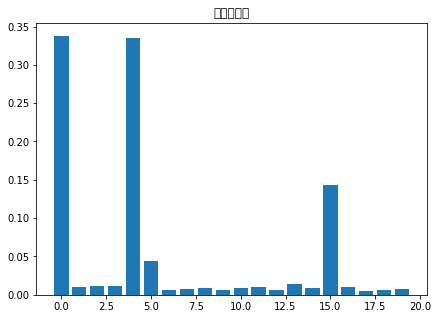

In [56]:
#변수 선택법 ( 연속형 - 평균 : 범주형 - 투표(다수표-홀수개로 만드는게좋다) )
print("Accuracy:\t", (y==rf.predict(X)).mean())
f, ax = plt.subplots(figsize=(7, 5))
ax.bar(range(0, len(rf.feature_importances_)), rf.feature_importances_)
ax.set_title('특성중요도')

In [54]:
print("종속변수갯수", rf.n_classes_)
print("클래스 종류", rf.classes_)
print("특성수", rf.n_features_)
print("모델", rf.estimators_) # 기본적으로 DT를 열개를 생성한다

종속변수갯수 2
클래스 종류 [0 1]
특성수 20
모델 [DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=190450455, splitter='best'), DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=937912050, splitter='best'), DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features='auto', max_leaf_nodes=None,


In [88]:
"""
1) 보스턴 집값에 대한 랜덤포레스트후 피팅하라
2) 변수와 변수중요도를 매핑한다음 정렬해보시오
"""

from sklearn.datasets import load_boston
boston = load_boston()

from sklearn.ensemble import RandomForestRegressor
X = boston["data"]
Y = boston["target"]
names = boston["feature_names"]
rf = RandomForestRegressor()
rf.fit(X, Y)



C:\Users\2-18\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

Text(0.5, 1.0, 'feature importance')

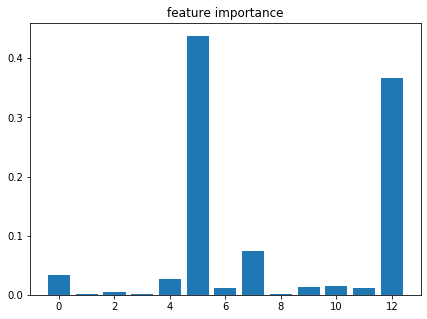

In [87]:
sorted(zip(map(lambda x:  round(x, 2), rf.feature_importances_), names), reverse=True)
# sorted(zip(rf.feature_importances_, names), reverse=True)

f, ax = plt.subplots(figsize=(7, 5))
ax.bar(range(0, len(rf.feature_importances_)), rf.feature_importances_)
ax.set_title('feature importance')


In [93]:
#평가
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

pred = rf.predict(X)

In [94]:
mean_squared_error(Y, pred)

1.7150369565217387

In [95]:
mean_absolute_error(Y, rf.predict(X))

0.8731818181818183

In [96]:
r2_score(Y, rf.predict(X))

0.9796843642088199

In [113]:

# GridSearchCV parameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import make_scorer
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_auc_score
cancer = load_breast_cancer() 
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0) # 음성, 양성 나눔

scaler = MinMaxScaler().fit(X_train) # 레인지 구함
X_train_scaled = scaler.transform(X_train) # 
learner = RandomForestClassifier(random_state=2) 
# estimator를 몇개로? : DT를 몇개로 구성할것인지? 하이퍼파라메터 구성의 노가다
# 규제 ( 과적합 )
n_estimators = [12, 24, 36, 48, 60]
min_samples_leaf = [1, 2, 4, 8, 16] # 최소라인 리프 노드가 가져야하는 최소 샘플수
parameters = {'n_estimators': n_estimators, 'min_samples_leaf': min_samples_leaf}


"\n# gridsearchCV 로 파라미터 튜닝\nfrom sklearn.model_selection import train_test_split\nfrom sklearn.model_selection import GridSearchCV\nfrom sklearn.datasets import load_breast_cancer\nfrom sklearn.metrics import make_scorer\nfrom sklearn.metrics import roc_auc_score\nfrom sklearn.preprocessing import MinMaxScaler\n\ncancer = load_breast_cancer()\nX_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)\n\nscaler = MinMaxScaler().fit(X_train)\nX_train_scaled = scaler.transform(X_train)\nlearner = RandomForestClassifier(random_state=2)\n\n# estimator를 몇개로 할건지 = DT를 몇개로 구성할건지\nn_estimators = [12, 24, 36, 48, 60]\n# 말단 노드 최소 샘플 수 규제 (과적합 제어)\nmin_samples_leaf = [1,2,4,8,16]\nparameters={'n_estimators': n_estimators, 'min_samples_leaf':min_samples_leaf}\n\n"

In [114]:
# 평가방법도 변경 : 여러가지가 있다
def auc_scorer(target_score, prediction):# 민감도, 특이도를 고려한 평가 방법
    auc_value = roc_auc_score(prediction, target_score) 
    return auc_value

scorer = make_scorer(auc_scorer, greater_is_better=True) # 하이퍼 파라메터 평가하기위해 평가방법 지정
grid_obj = GridSearchCV(learner, parameters, scorer) # 앞에 두파라메터를 순서대로 넣고 scorer가 평가
grid_obj.fit(X_train_scaled, y_train) # 피팅

#평균값만 알고싶다 
scores = grid_obj.cv_results_['mean_test_score'].reshape(len(n_estimator), len(min_samples_leaf)) #reshape해줘서 보기쉽게 표로
scores

C:\Users\2-18\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


array([[0.94633021, 0.94123074, 0.93608581, 0.93572695, 0.93649791],
       [0.94082675, 0.94860738, 0.94450369, 0.94652309, 0.94728643],
       [0.93404406, 0.93668785, 0.94267291, 0.94354753, 0.94843122],
       [0.92944544, 0.93218606, 0.92736673, 0.92803678, 0.92612864],
       [0.92676507, 0.93010735, 0.92479024, 0.92152463, 0.92476142]])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

C:\Users\2-18\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\2-18\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\2-18\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\2-18\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51473 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\2-18\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50836 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\2-18\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.

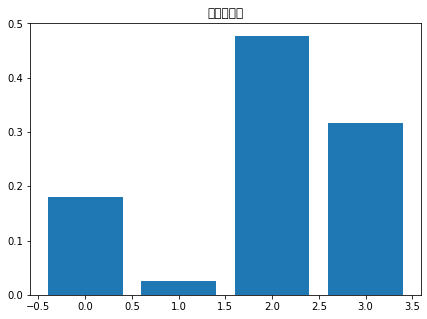

In [147]:
# 분류기를 생성해보시오
"""
-데이터확인
-데이터분할 train_test_split
-모델생성 
-fitting
-변수중요도확인
"""
from sklearn.ensemble import RandomForestClassifier # 분류
from sklearn.datasets import load_iris
iris = load_iris()
# print(iris["feature_names"])

print(iris.data, '\n\n--\n\n', iris.target)

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)

print(X_train, "\n\n", X_test, "\n\n", y_train, "\n\n", y_test)
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

#변수 선택법 ( 연속형 - 평균 : 범주형 - 투표(다수표-홀수개로 만드는게좋다) )
print("Accuracy:\t", (y_train==rf.predict(X_train)).mean())
f, ax = plt.subplots(figsize=(7, 5))
ax.bar(range(0, len(rf.feature_importances_)), rf.feature_importances_)
ax.set_title('특성중요도')

import matplotlib as mpl
print( mpl.matplotlib_fname())

In [154]:
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn import datasets
iris = datasets.load_iris()
feat_labels = iris.feature_names
X = iris.data
y = iris.target


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.4)

print(X_train, '\n\n--\n\n', X_test, '\n\n--\n\n', y_train, '\n\n--\n\n', y_test)
clf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(accuracy_score(y_test, y_pred))
for feature in zip(feat_labels, clf.feature_importances_):
    print(feature)
    

[[6.  3.4 4.5 1.6]
 [4.8 3.1 1.6 0.2]
 [5.8 2.7 5.1 1.9]
 [5.6 2.7 4.2 1.3]
 [5.6 2.9 3.6 1.3]
 [5.5 2.5 4.  1.3]
 [6.1 3.  4.6 1.4]
 [7.2 3.2 6.  1.8]
 [5.3 3.7 1.5 0.2]
 [4.3 3.  1.1 0.1]
 [6.4 2.7 5.3 1.9]
 [5.7 3.  4.2 1.2]
 [5.4 3.4 1.7 0.2]
 [5.7 4.4 1.5 0.4]
 [6.9 3.1 4.9 1.5]
 [4.6 3.1 1.5 0.2]
 [5.9 3.  5.1 1.8]
 [5.1 2.5 3.  1.1]
 [4.6 3.4 1.4 0.3]
 [6.2 2.2 4.5 1.5]
 [7.2 3.6 6.1 2.5]
 [5.7 2.9 4.2 1.3]
 [4.8 3.  1.4 0.1]
 [7.1 3.  5.9 2.1]
 [6.9 3.2 5.7 2.3]
 [6.5 3.  5.8 2.2]
 [6.4 2.8 5.6 2.1]
 [5.1 3.8 1.6 0.2]
 [4.8 3.4 1.6 0.2]
 [6.5 3.2 5.1 2. ]
 [6.7 3.3 5.7 2.1]
 [4.5 2.3 1.3 0.3]
 [6.2 3.4 5.4 2.3]
 [4.9 3.  1.4 0.2]
 [5.7 2.5 5.  2. ]
 [6.9 3.1 5.4 2.1]
 [4.4 3.2 1.3 0.2]
 [5.  3.6 1.4 0.2]
 [7.2 3.  5.8 1.6]
 [5.1 3.5 1.4 0.3]
 [4.4 3.  1.3 0.2]
 [5.4 3.9 1.7 0.4]
 [5.5 2.3 4.  1.3]
 [6.8 3.2 5.9 2.3]
 [7.6 3.  6.6 2.1]
 [5.1 3.5 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [5.7 2.8 4.5 1.3]
 [6.6 3.  4.4 1.4]
 [5.  3.2 1.2 0.2]
 [5.1 3.3 1.7 0.5]
 [6.4 2.9 4.

In [163]:
sfm = SelectFromModel(clf, threshold=0.15)# 문지방 : 변수제거법- 변수중요도에 따라 위수치보다 작을경우
sfm.fit(X_train, y_train)
X_impotant_train = sfm.transform(X_train) # 정리된 변수 데이터
X_impotant_test = sfm.transform(X_test)
# Y_impotant_train = sfm.transform(y_train)
# Y_impotant_test = sfm.transform(y_test)

# 문제 X_impotant_train, X_impotant_test에 대하여 위의 모델로 학습하고 평가해보시오

print(X_impotant_train, '\n\n--\n\n', X_impotant_test, '\n\n--\n\n')
print( y_train, '\n\n--\n\n', y_test)

clf2 = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
clf2.fit(X_impotant_train, y_train)

sfm2 = SelectFromModel(clf2, threshold=0.15)# 문지방 : 변수제거법- 변수중요도에 따라 위수치보다 작을경우
sfm2.fit(X_impotant_train, y_train)

for feature in zip(feat_labels, clf2.feature_importances_):
    print(feature)

[[4.5 1.6]
 [1.6 0.2]
 [5.1 1.9]
 [4.2 1.3]
 [3.6 1.3]
 [4.  1.3]
 [4.6 1.4]
 [6.  1.8]
 [1.5 0.2]
 [1.1 0.1]
 [5.3 1.9]
 [4.2 1.2]
 [1.7 0.2]
 [1.5 0.4]
 [4.9 1.5]
 [1.5 0.2]
 [5.1 1.8]
 [3.  1.1]
 [1.4 0.3]
 [4.5 1.5]
 [6.1 2.5]
 [4.2 1.3]
 [1.4 0.1]
 [5.9 2.1]
 [5.7 2.3]
 [5.8 2.2]
 [5.6 2.1]
 [1.6 0.2]
 [1.6 0.2]
 [5.1 2. ]
 [5.7 2.1]
 [1.3 0.3]
 [5.4 2.3]
 [1.4 0.2]
 [5.  2. ]
 [5.4 2.1]
 [1.3 0.2]
 [1.4 0.2]
 [5.8 1.6]
 [1.4 0.3]
 [1.3 0.2]
 [1.7 0.4]
 [4.  1.3]
 [5.9 2.3]
 [6.6 2.1]
 [1.4 0.2]
 [1.5 0.2]
 [1.4 0.2]
 [4.5 1.3]
 [4.4 1.4]
 [1.2 0.2]
 [1.7 0.5]
 [4.3 1.3]
 [1.5 0.4]
 [6.9 2.3]
 [3.3 1. ]
 [6.4 2. ]
 [4.4 1.4]
 [1.5 0.1]
 [4.8 1.8]
 [1.2 0.2]
 [6.7 2. ]
 [1.5 0.3]
 [1.6 0.2]
 [6.1 1.9]
 [1.4 0.2]
 [5.6 2.4]
 [4.1 1.3]
 [3.9 1.2]
 [3.5 1. ]
 [5.3 2.3]
 [5.2 2.3]
 [4.9 1.5]
 [5.  1.7]
 [1.6 0.2]
 [3.7 1. ]
 [5.6 2.4]
 [5.1 1.9]
 [1.5 0.2]
 [4.6 1.3]
 [4.1 1.3]
 [4.8 1.8]
 [4.4 1.3]
 [1.3 0.2]
 [1.5 0.4]
 [1.5 0.1]
 [5.6 1.8]
 [4.1 1. ]
 [6.7 2.2]
 [1.4 0.2]] 

--

 [[